In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
train=pd.read_csv("/kaggle/input/titanic-train/train.csv")

In [17]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
train.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [13]:
train.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [14]:
train.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [15]:
train.groupby('Age').count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
0.42,1,1,1,1,1,1,1,1,1,0,1
0.67,1,1,1,1,1,1,1,1,1,0,1
0.75,2,2,2,2,2,2,2,2,2,0,2
0.83,2,2,2,2,2,2,2,2,2,0,2
0.92,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
70.00,2,2,2,2,2,2,2,2,2,1,2
70.50,1,1,1,1,1,1,1,1,1,0,1
71.00,2,2,2,2,2,2,2,2,2,1,2


In [16]:
train.groupby('Fare').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
Fare,,,,,,,,,,,
0.0000,15,15,15,15,15,7,15,15,15,3,15
4.0125,1,1,1,1,1,1,1,1,1,0,1
5.0000,1,1,1,1,1,1,1,1,1,1,1
6.2375,1,1,1,1,1,1,1,1,1,0,1
6.4375,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
227.5250,4,4,4,4,4,3,4,4,4,2,4
247.5208,2,2,2,2,2,2,2,2,2,2,2
262.3750,2,2,2,2,2,2,2,2,2,2,2


In [22]:
train['Sex']  # 'Sex' 열을 선택

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [26]:
train[train['Age'] >= 20] # 나이가 20세 이상인 사람만 선택

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
train['Age_group'] = train['Age'].apply(lambda x: 'Adult' if x >= 18 else 'Child')

# 결과 확인 (처음 10개 행 출력)
print(train[['Age', 'Age_group']].head(10))

    Age Age_group
0  22.0     Adult
1  38.0     Adult
2  26.0     Adult
3  35.0     Adult
4  35.0     Adult
5   NaN     Child
6  54.0     Adult
7   2.0     Child
8  27.0     Adult
9  14.0     Child


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_group    891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


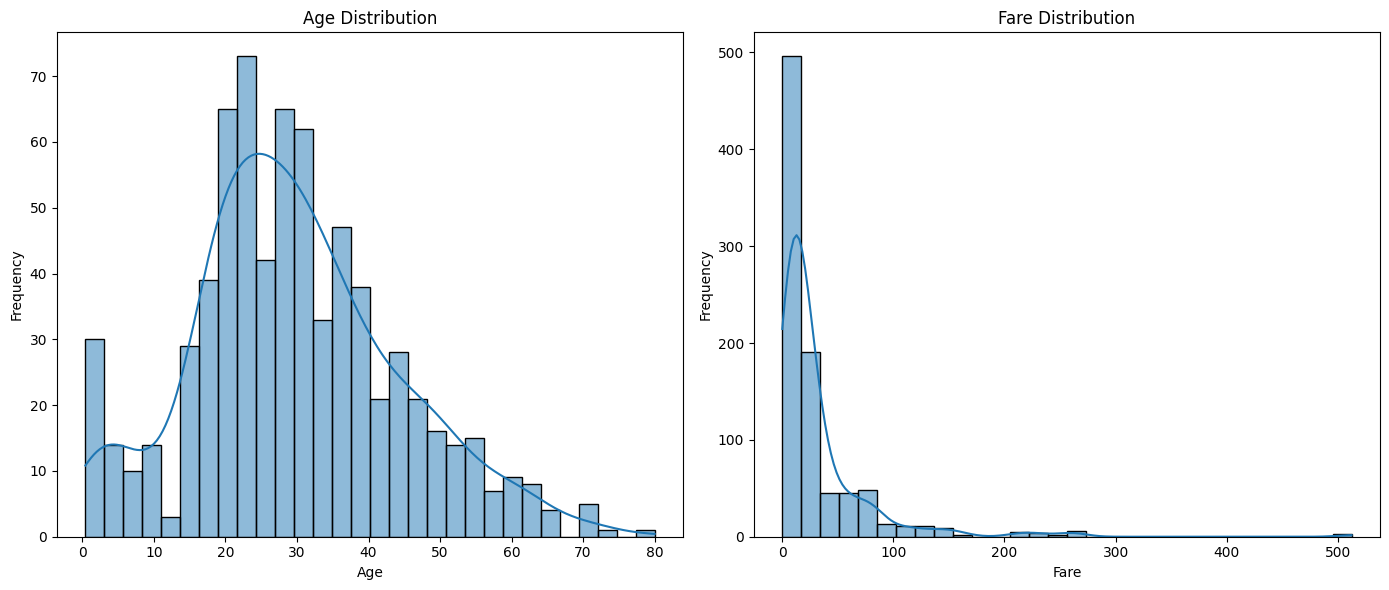

In [41]:
# 나이(Age)와 요금(Fare)의 분포를 히스토그램으로 그리기
plt.figure(figsize=(14, 6))

# 나이 분포 히스토그램
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째
sns.histplot(train['Age'], bins=30, kde=True)  # kde=True는 커널 밀도 추정 그래프 추가
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 요금 분포 히스토그램
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째
sns.histplot(train['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

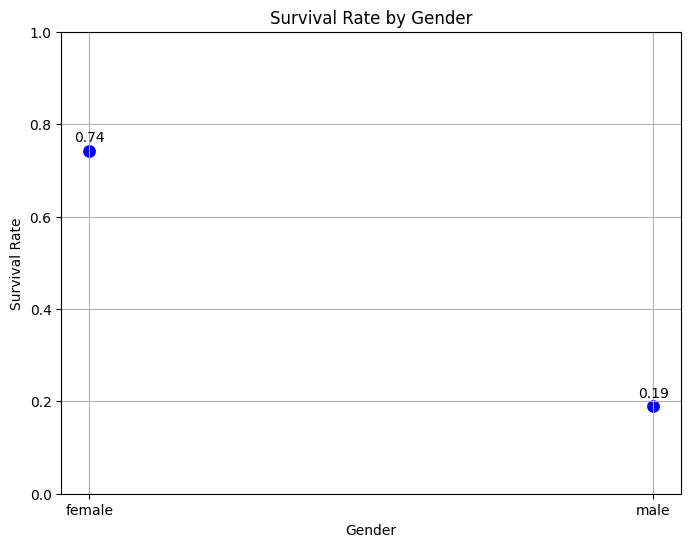

In [42]:
# 생존율 계산
survival_rate = train.groupby('Sex')['Survived'].mean().reset_index()

# 산점도로 성별에 따른 생존율 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=survival_rate, x='Sex', y='Survived', s=100, color='blue', marker='o')

# 생존율 표시
for i in range(survival_rate.shape[0]):
    plt.text(x=survival_rate['Sex'][i], y=survival_rate['Survived'][i] + 0.02,
             s=f"{survival_rate['Survived'][i]:.2f}", ha='center')

plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Y축 범위 설정 (0%에서 100%까지)
plt.grid(True)
plt.show()